In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np


import bezier_curve as bz
import display as d
import graphics as g

print("import success")

import success


In [4]:
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

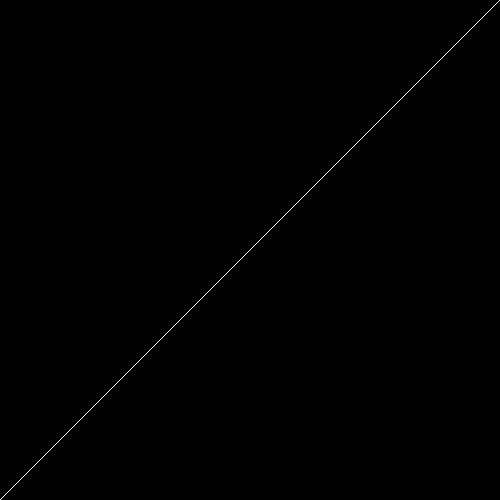

In [5]:
control_points = np.array([
    [0, 0],
    [499, 499]
], dtype=float)

n_segments = 50
curve = bz.get_curve(n_segments, control_points)
curve = np.rint(curve).astype(int)

screen = g.create_screen((500, 500))
g.draw_points_xy(screen, curve, lines=True)

imshow(screen)

In [6]:
# d.add_curve(fig, curve)

# fig.update_layout(title="Linear Interpolation")
# fig.show("png")

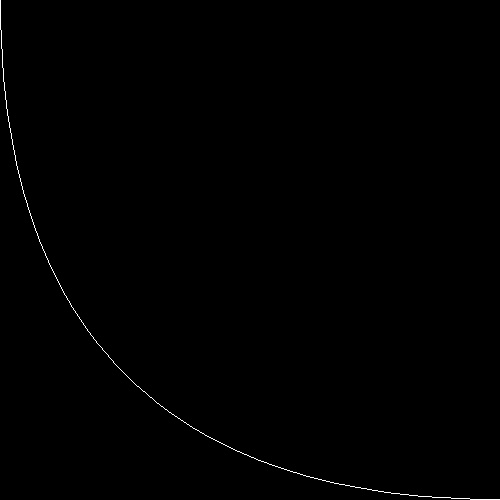

In [7]:
control_points = np.array([
    [0, 499],
    [0, 0],
    [499, 0]
], dtype=float)

n_segments = 50
curve = bz.get_curve(n_segments, control_points)
curve = np.rint(curve).astype(int)

screen = g.clear_screen(screen)
g.draw_points_xy(screen, curve, lines=True)

imshow(screen)

In [8]:
# d.add_curve(fig, curve)

# fig.update_layout(title="Quadratic Bezier Curve")
# fig.show("png")

In [9]:
# fig.data = []

# def plot_quadratic(figure, n_segments, control_points):  
#     t_space = np.linspace(0, 1, n_segments + 1)
#     for i, dt in enumerate(t_space):
#         p0 = bz.linear(*control_points[0:2], dt)
#         p1 = bz.linear(*control_points[1:3], dt)
#         d.add_line(figure, p0, p1, i)

# plot_quadratic(fig, n_segments, control_points)
# fig.update_traces(connectgaps=False)
# fig.update_layout(title="Linear Interpolations")
# fig.show("png")

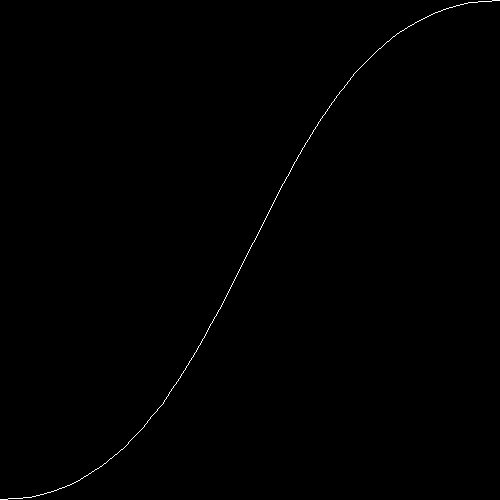

In [10]:
control_points = np.array([
    [0, 0],
    [249, 0],
    [249, 499],
    [499, 499]
], dtype=float)

n_segments = 50
curve = bz.get_curve(n_segments, control_points)
curve = np.rint(curve).astype(int)

screen = g.clear_screen(screen)
g.draw_points_xy(screen, curve, lines=True)

imshow(screen)

In [11]:
# fig.data = []

# def plot_cubic(figure, n_segments, control_points):
#     t_space = np.linspace(0, 1, n_segments + 1)

#     for i, dt in enumerate(t_space):
#         p0 = bz.quadratic(*control_points[0:3], dt)
#         p1 = bz.quadratic(*control_points[1:4], dt)
#         d.add_line(fig, p0, p1, i)

# plot_cubic(fig, n_segments, control_points)

# fig.update_traces(connectgaps=False)
# fig.update_layout(title="Linear Interpolations")
# fig.show("png")

In [12]:
# fig.data = []

# plot_quadratic(fig, n_segments, control_points[0:3])
# plot_quadratic(fig, n_segments, control_points[1:4])

# fig.update_traces(connectgaps=False)
# fig.update_layout(title="Linear Interpolations")
# fig.show("png")

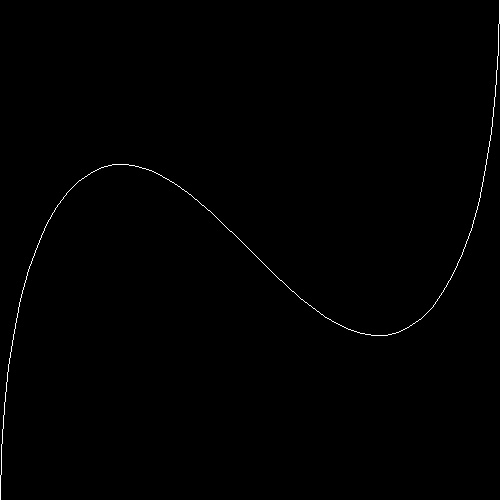

In [13]:
control_points = np.array([
    [0, 0],
    [0, 499],
    [249, 499],
    [249, 0],
    [499, 0],
    [499, 499]
], dtype=float)

n_segments = 50
curve = bz.get_curve(n_segments, control_points)
curve = np.rint(curve).astype(int)

screen = g.clear_screen(screen)
g.draw_points_xy(screen, curve, lines=True)

imshow(screen)